In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima

In [3]:
data_final = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\HCV_input_2023.xlsx")
#data = data.iloc[6:-1,:]
data_final.shape

(162, 40)

In [4]:
data_final.isnull().sum()

Date                                          0
HCV Sales                                    24
FoodAGRO                                     24
Food products                                24
Consumer goods                               24
Cosmetics, toiletries, soaps & detergents    24
Electronics                                  24
Wholesale & retail trading (mil)             24
Wholesale trading (mil)                      24
Retail trading(mil)                          24
M1                                           24
M3                                           24
BEI                                          24
IIP                                          24
PMI                                          24
CC                                           24
WPI                                          24
CMR                                          24
Vloans                                       24
E-comm                                       24
Retail Sales                            

In [5]:
data_final.columns

Index(['Date', 'HCV Sales', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading (mil)', 'Wholesale trading (mil)',
       'Retail trading(mil)', 'M1', 'M3', 'BEI', 'IIP', 'PMI', 'CC', 'WPI',
       'CMR', 'Vloans', 'E-comm', 'Retail Sales', 'Credit_CS', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'Infra Index', 'Evnt_Pos ',
       'Evnt_Negative', 'COSPI', 'GDP', 'Growth YoY%', 'GVA Gross Value Add',
       'GVA Agriculture', 'GVA Mining', 'GVA_Manu', 'Electricity', 'GVA_Cons',
       'Trade', 'GVA Real Estate', 'Social  and personal  services '],
      dtype='object')

In [6]:
## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [7]:
columns_to_forecast = ['BEI','IIP','CC','Retail Sales','Ind_freight','COSPI','Growth YoY%']

In [8]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(162, 7)

In [9]:
data

,BEI,IIP,CC,Retail Sales,Ind_freight,COSPI,Growth YoY%
Date,,,,,,,
2011-07-01,121.5,100.31,115.0,474.0,109.317315,2646905.3,6.68
2011-08-01,121.5,100.31,115.0,474.0,109.059972,2518331.2,6.68
2011-09-01,121.5,100.31,115.0,474.0,108.807408,2481991.1,6.68
2011-10-01,118.8,100.31,116.2,474.0,108.555673,2728697.7,6.18
2011-11-01,118.8,100.31,116.2,474.0,108.296462,2508661.5,6.18
...,...,...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


24 BEI
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=916.848, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=601.897, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=919.056, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=643.134, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=578.977, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=569.749, Time=1.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=570.383, Time=0.49 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=571.749, Time=1.65 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=571.749, Time=1.80 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf

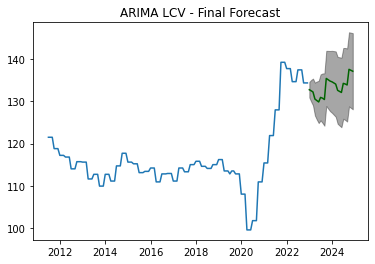

24 IIP
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1070.847, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=955.101, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1068.860, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=984.797, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=937.859, Time=0.80 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1041.654, Time=0.50 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=939.240, Time=0.94 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=939.034, Time=0.85 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=973.706, Time=0.61 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=940.682, Time=1.15 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

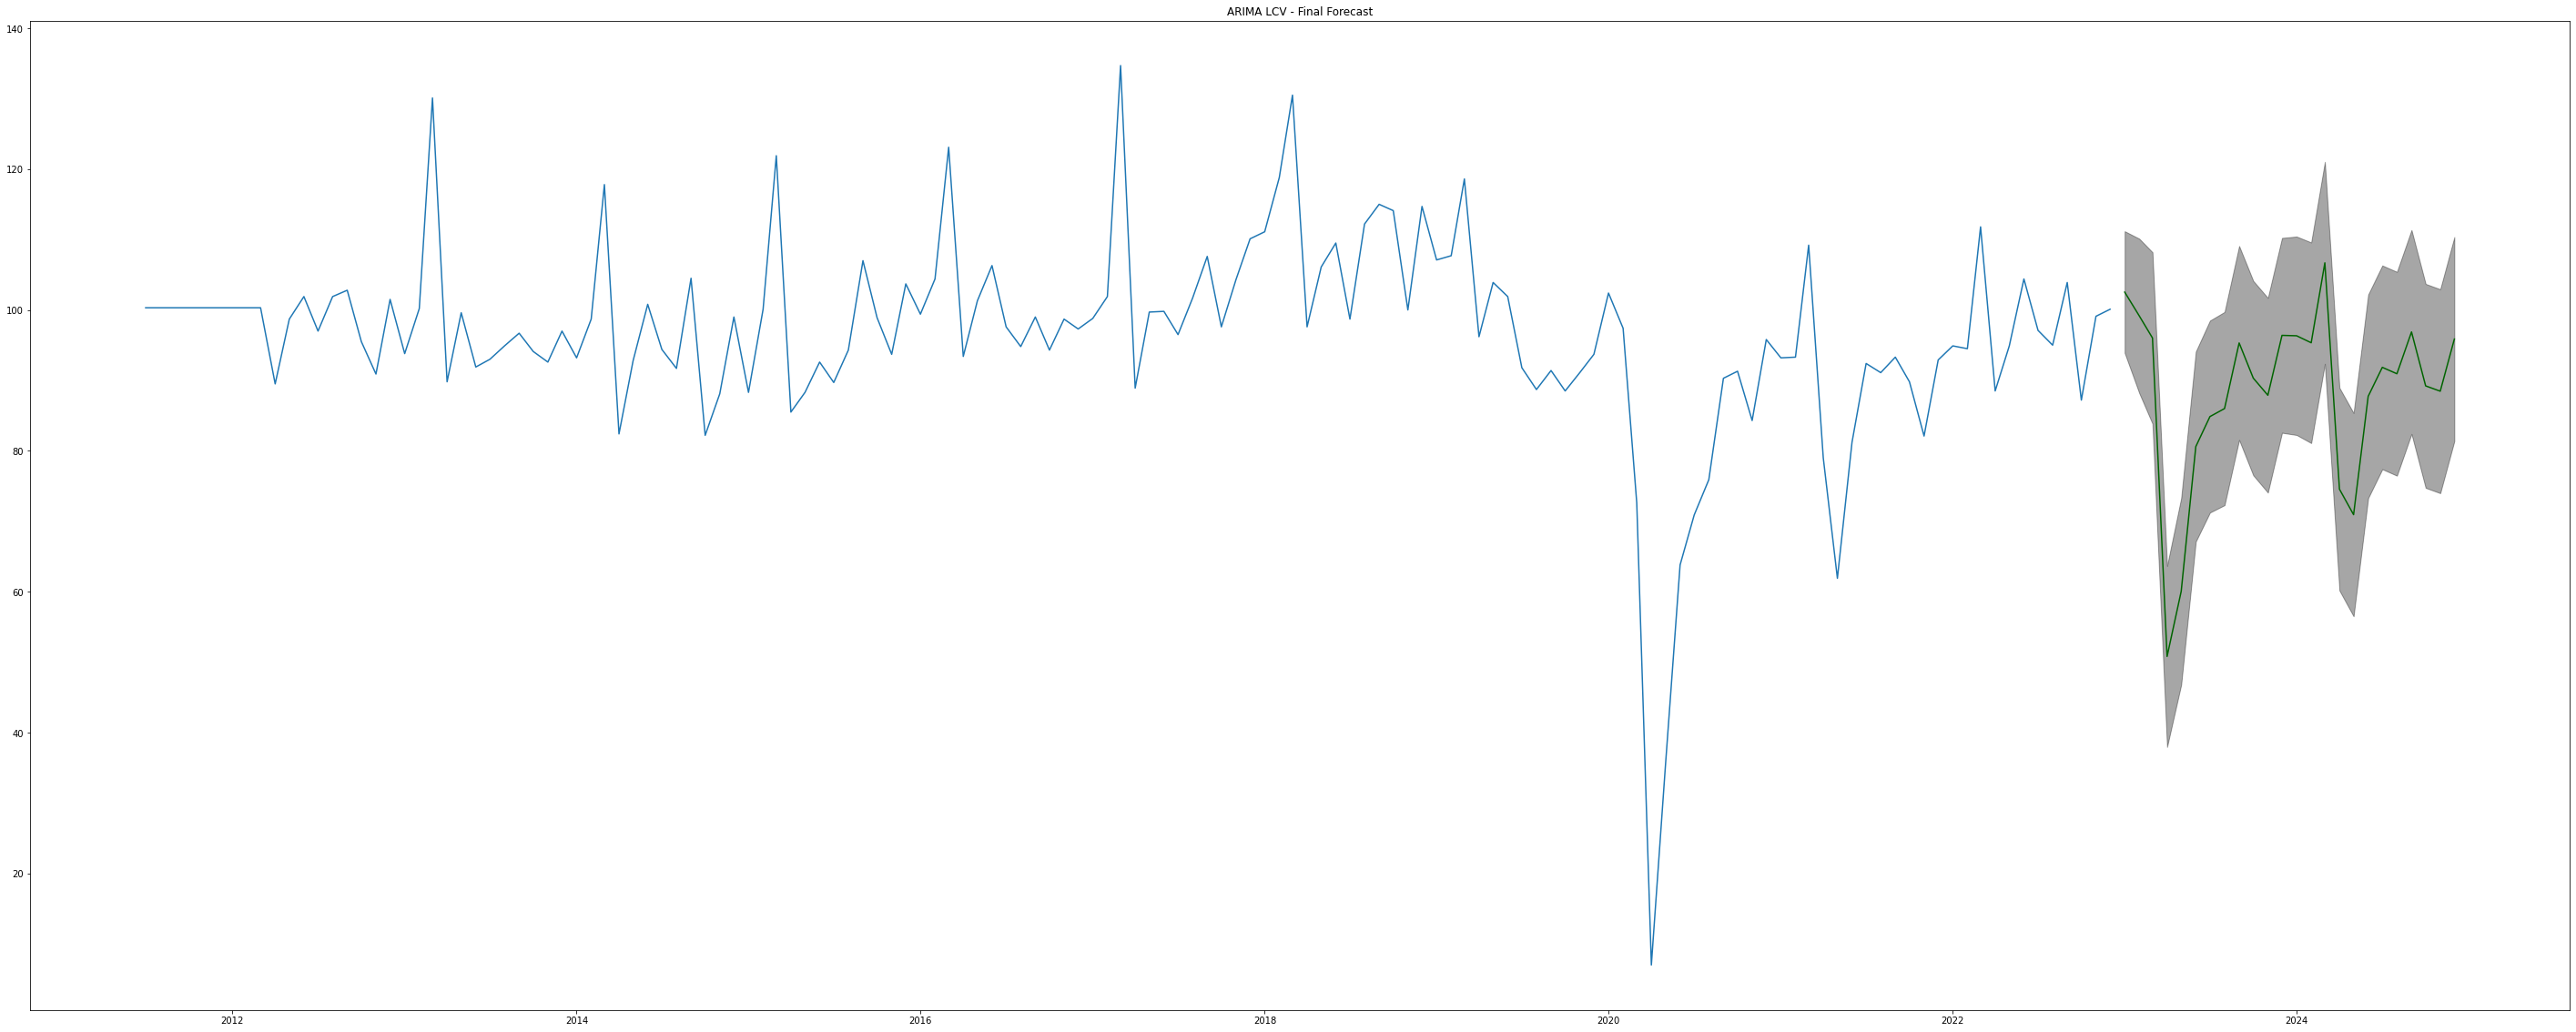

24 CC
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=775.964, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=756.632, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=777.882, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=742.162, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=740.286, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=754.634, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=742.210, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=738.525, Time=0.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=753.069,

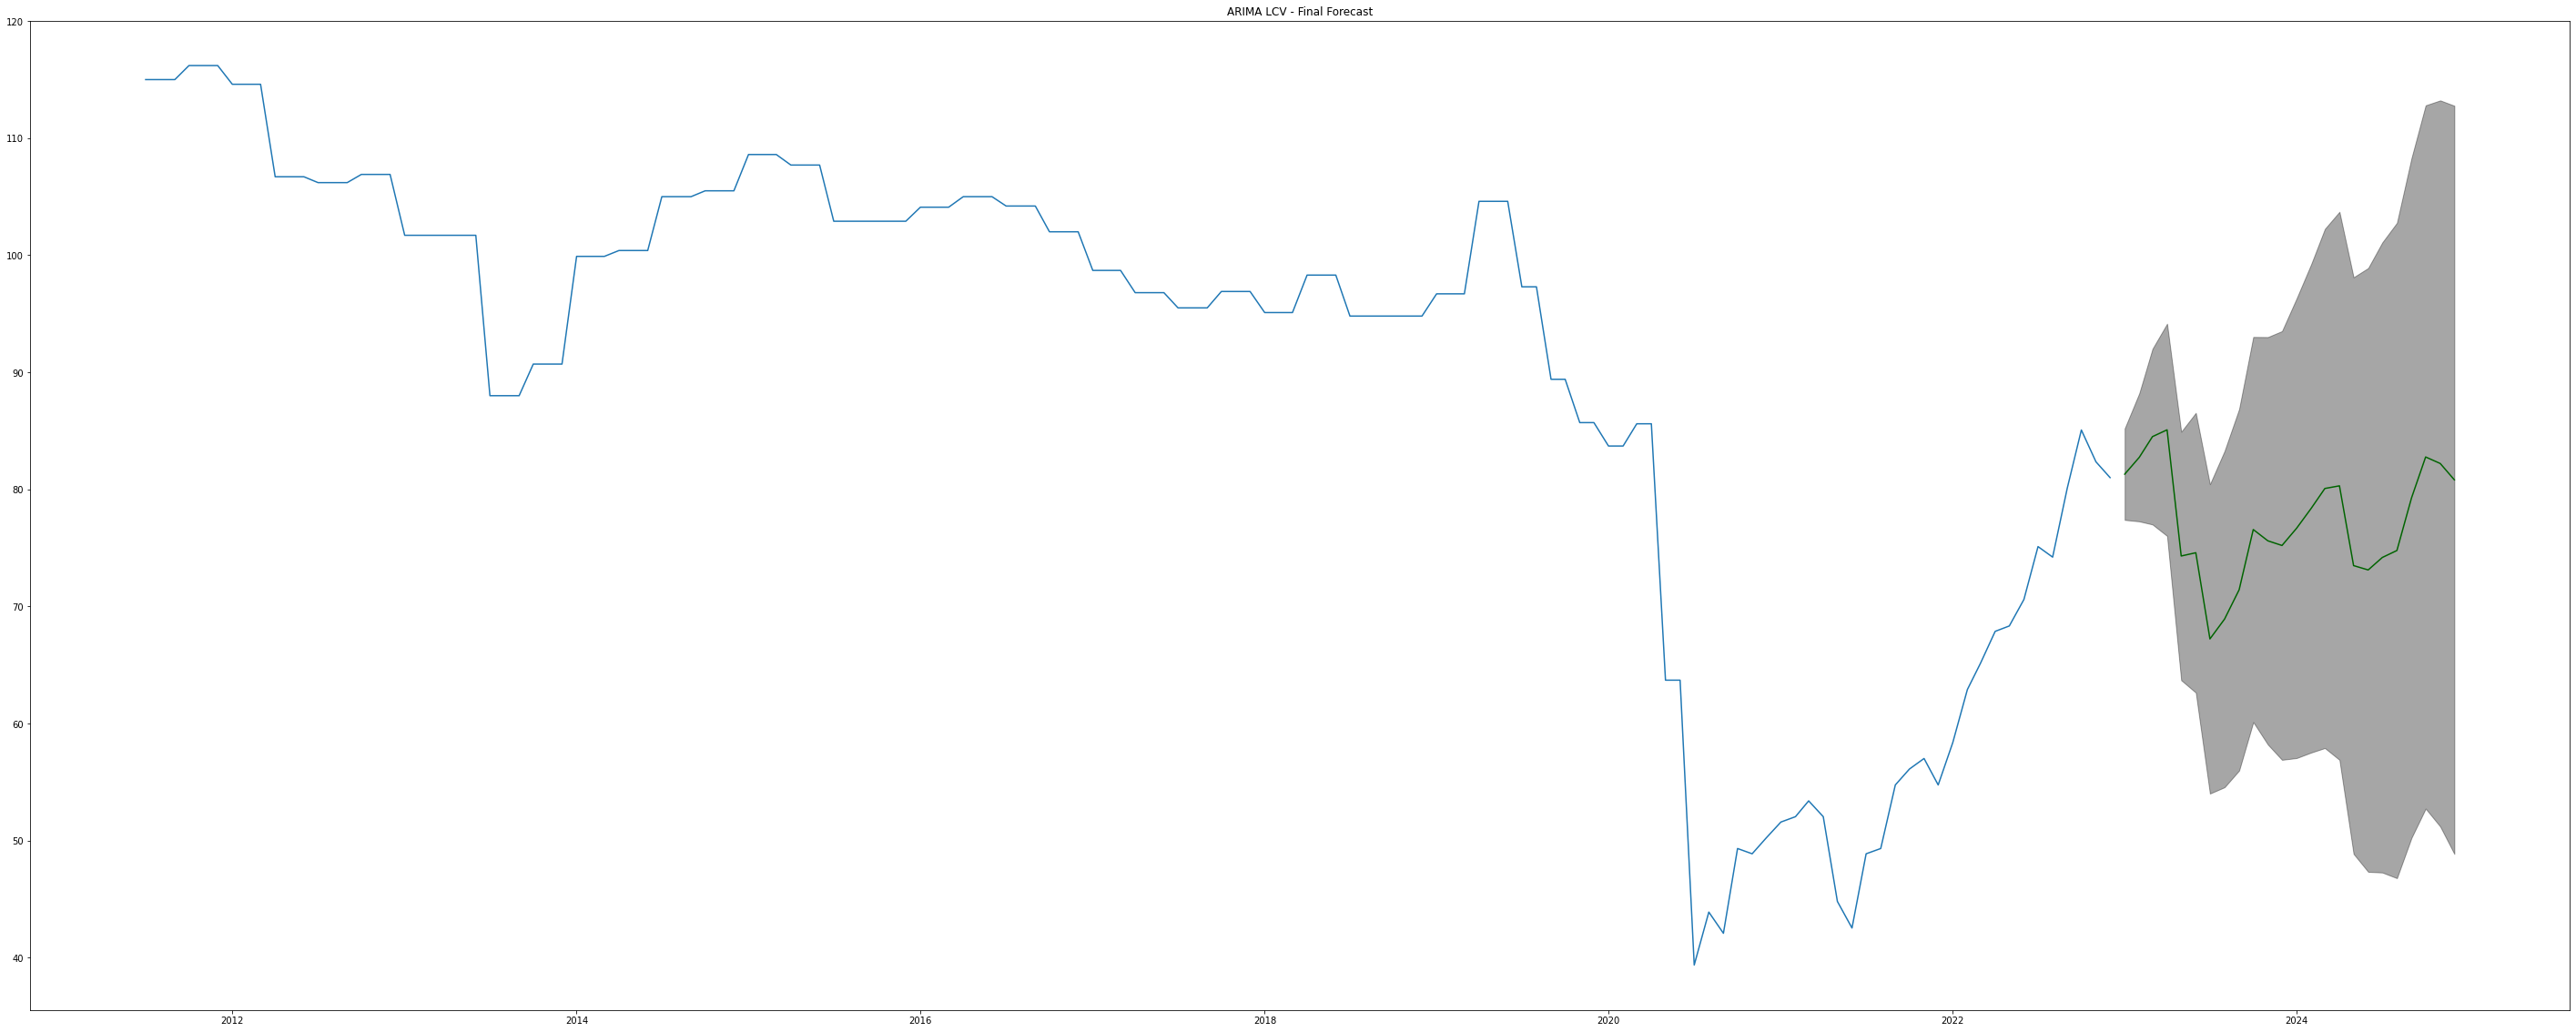

24 Retail Sales
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1675.084, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1396.389, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1560.126, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1678.912, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1419.182, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1386.324, Time=1.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1676.938, Time=0.50 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1388.100, Time=1.18 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1388.103, Time=1.34 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1561.745, Time=1.17 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=1390.096, Time=1.86 sec
 ARIMA(1,0,0)(2,1,

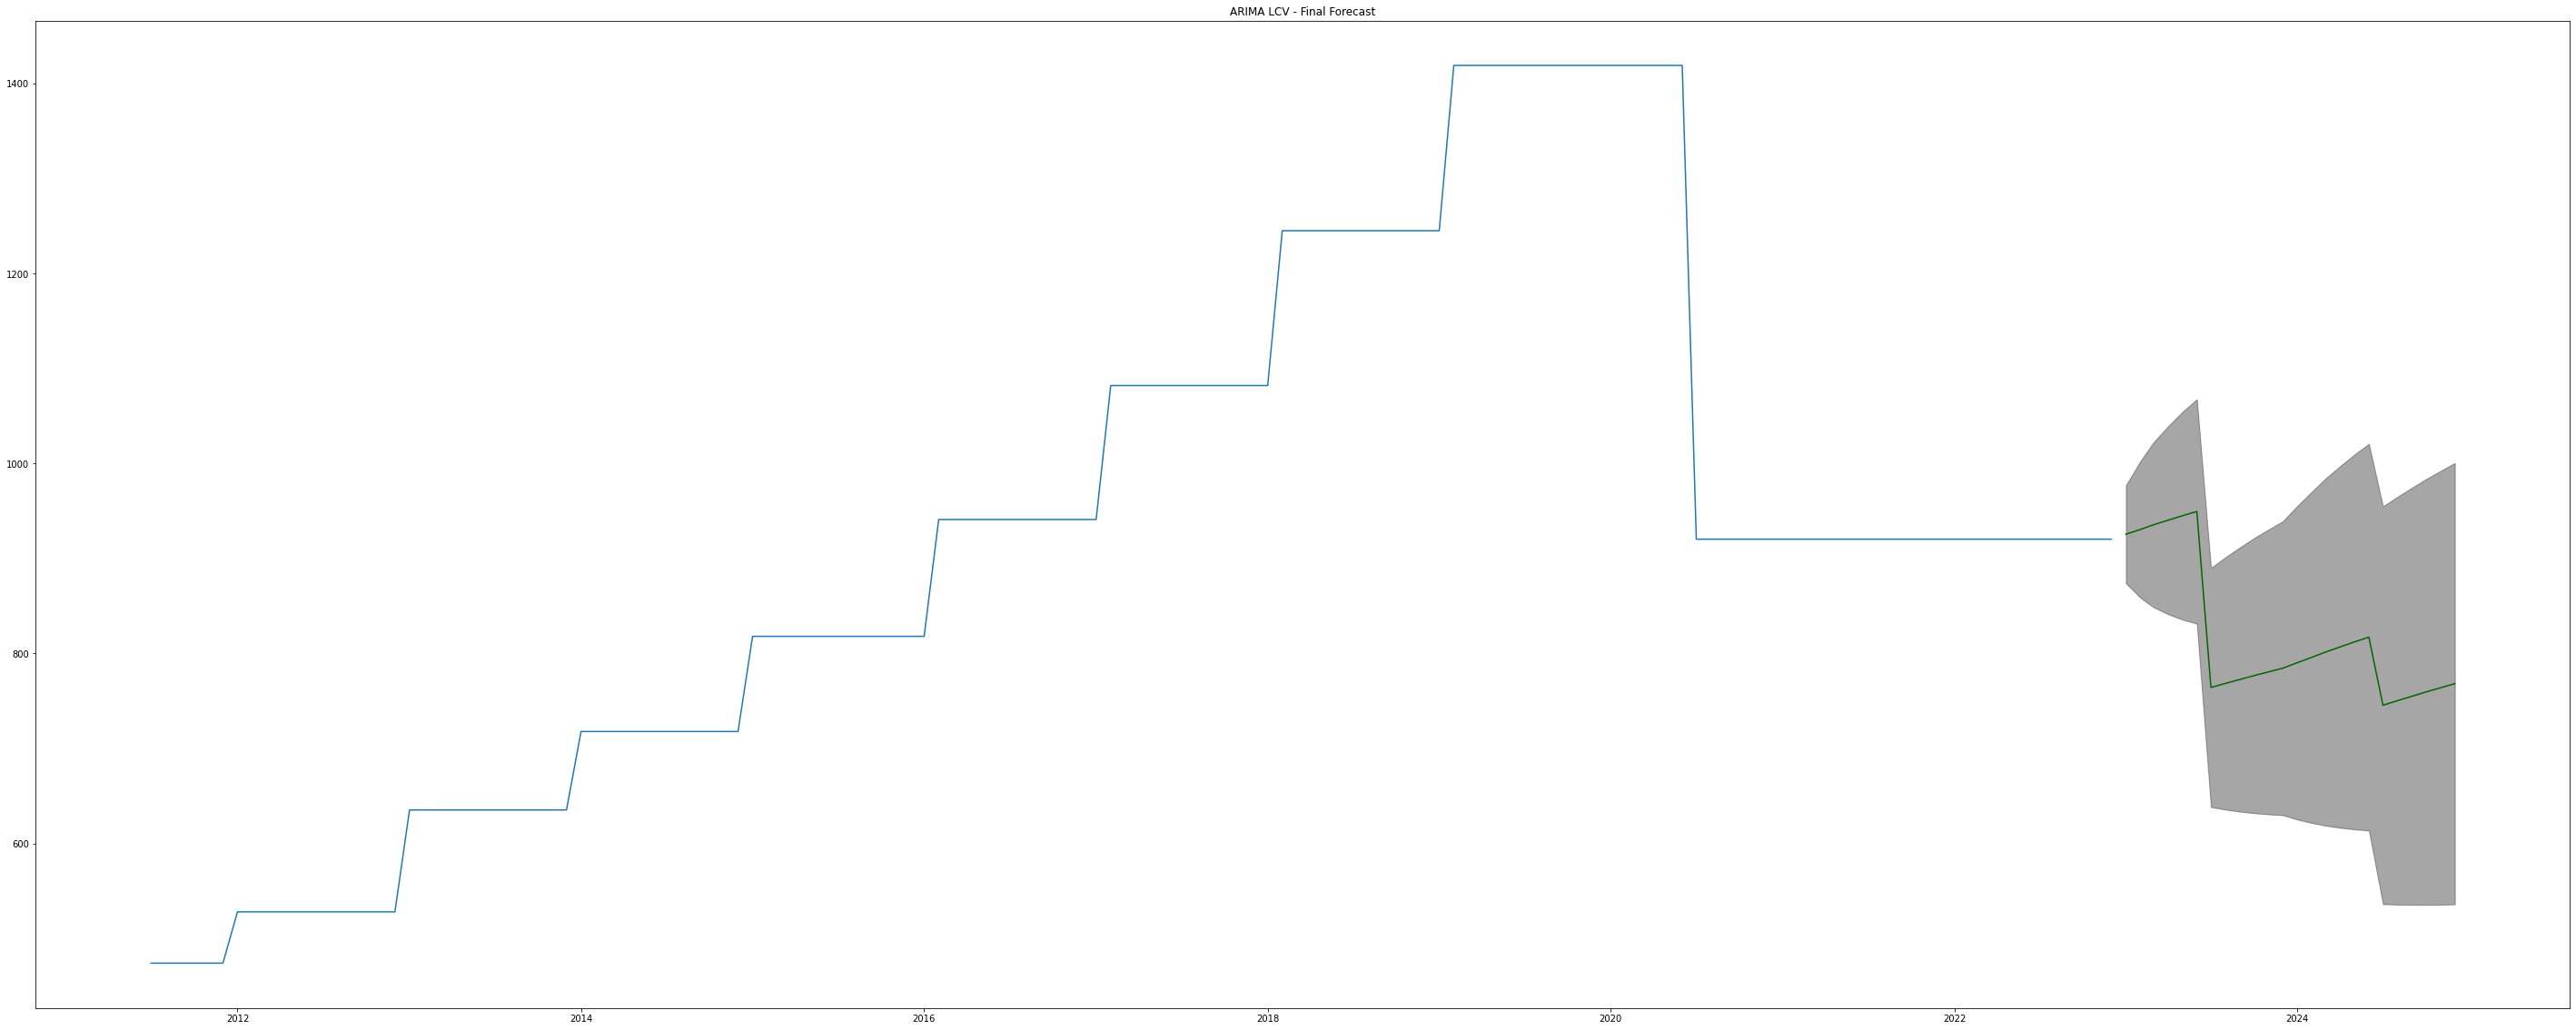

24 Ind_freight
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=859.818, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=661.243, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=859.220, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=680.952, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=649.247, Time=0.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=849.544, Time=0.41 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=651.238, Time=1.00 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=651.240, Time=0.86 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=758.494, Time=0.60 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=652.733, Time=1.20 sec
 ARIMA(1,0,0)(2,1,0)[12]          

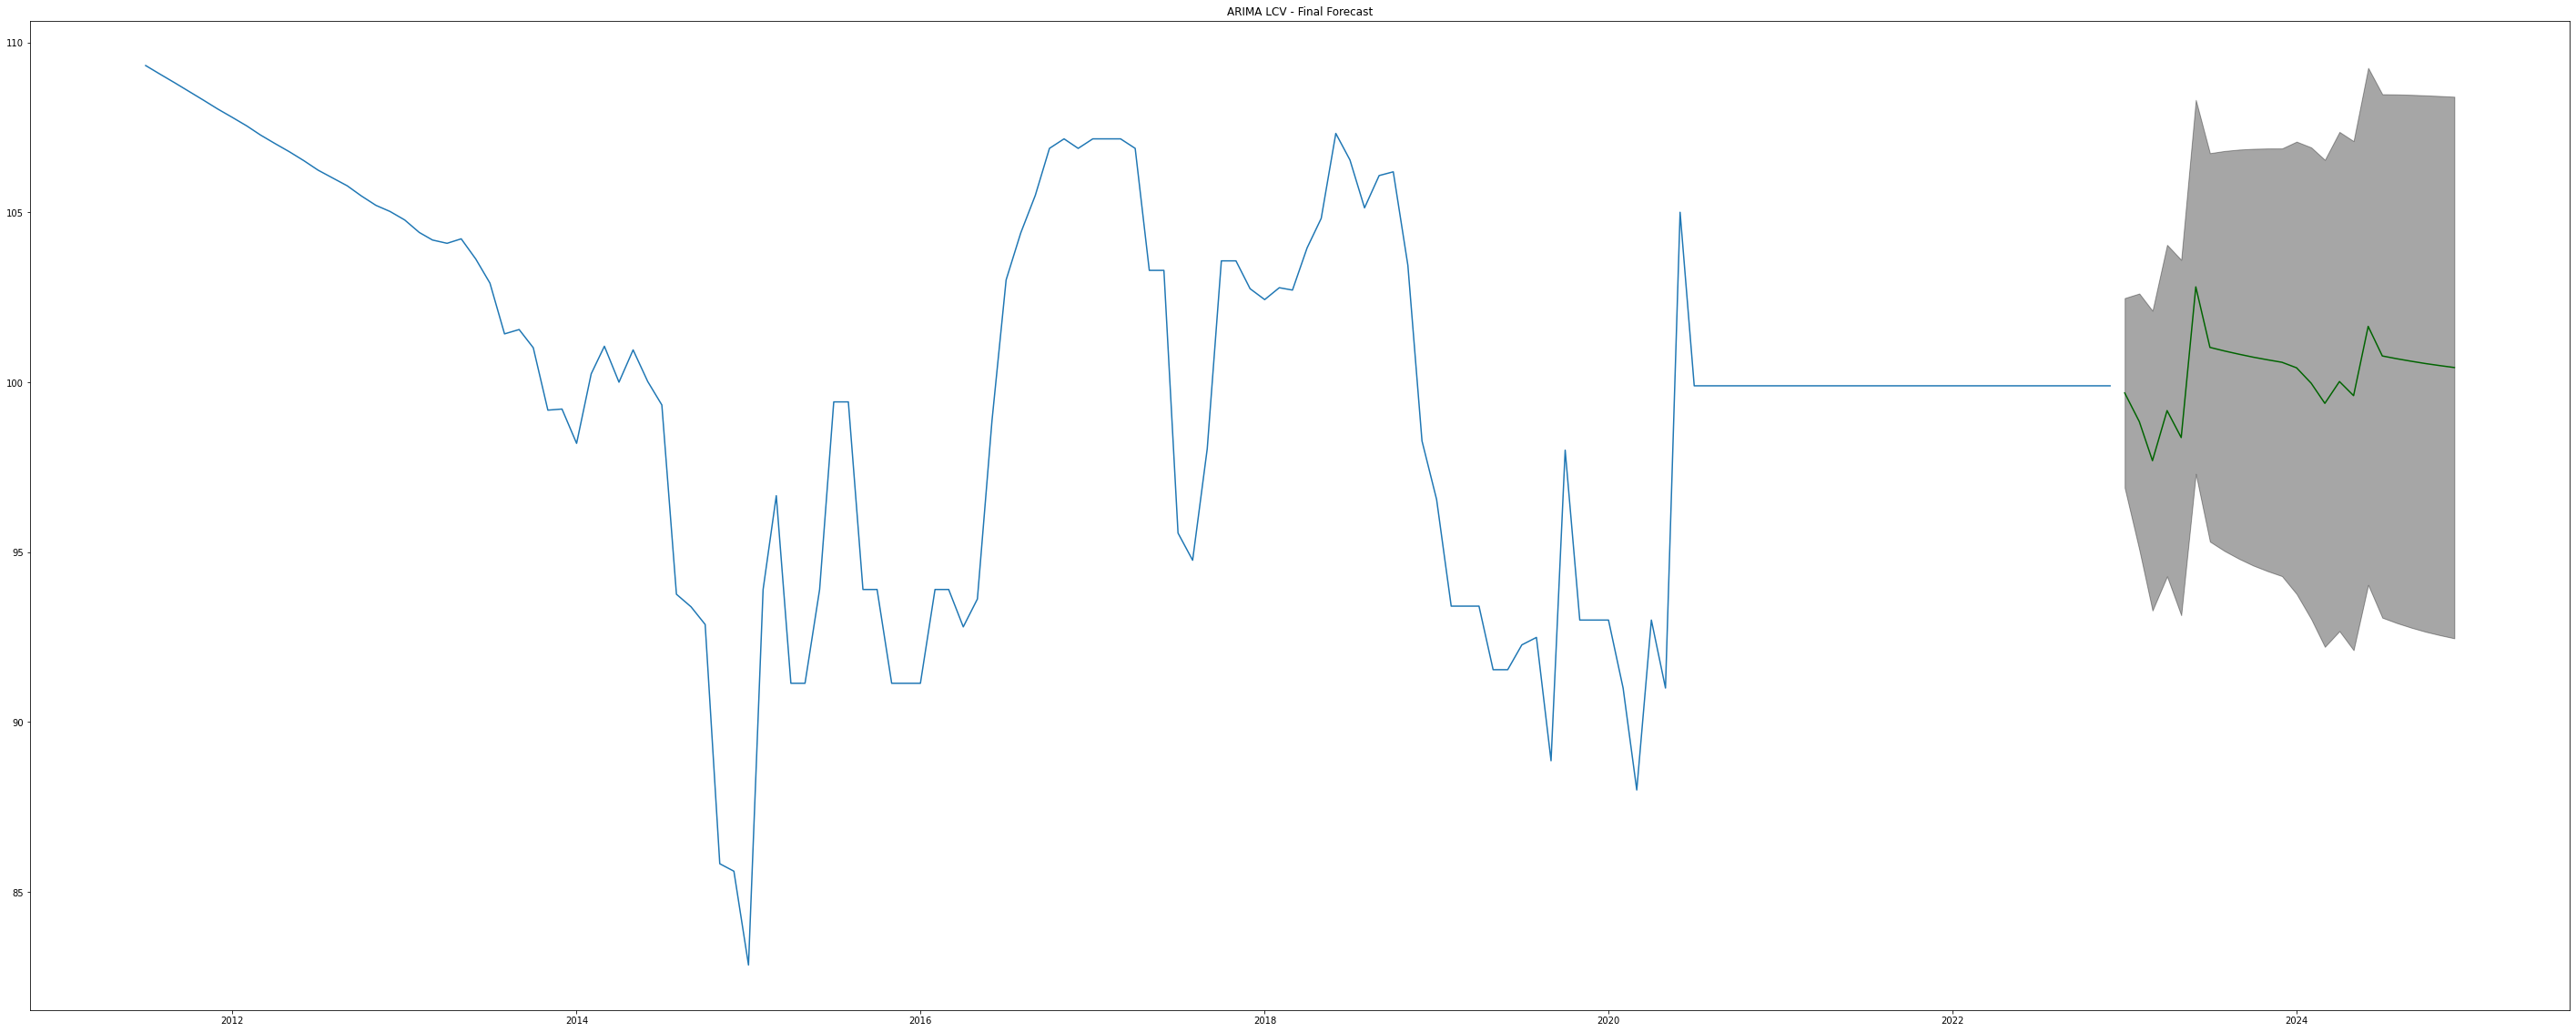

24 COSPI
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3768.468, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3792.420, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3772.897, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3767.058, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3792.624, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3769.056, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3769.056, Time=0.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3773.169, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3770.859, Time=0.60 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3771.585, Time=0.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3768.926, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3766.509, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3792.839, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3768.507, Time=0.17 sec
 ARIMA(1,1

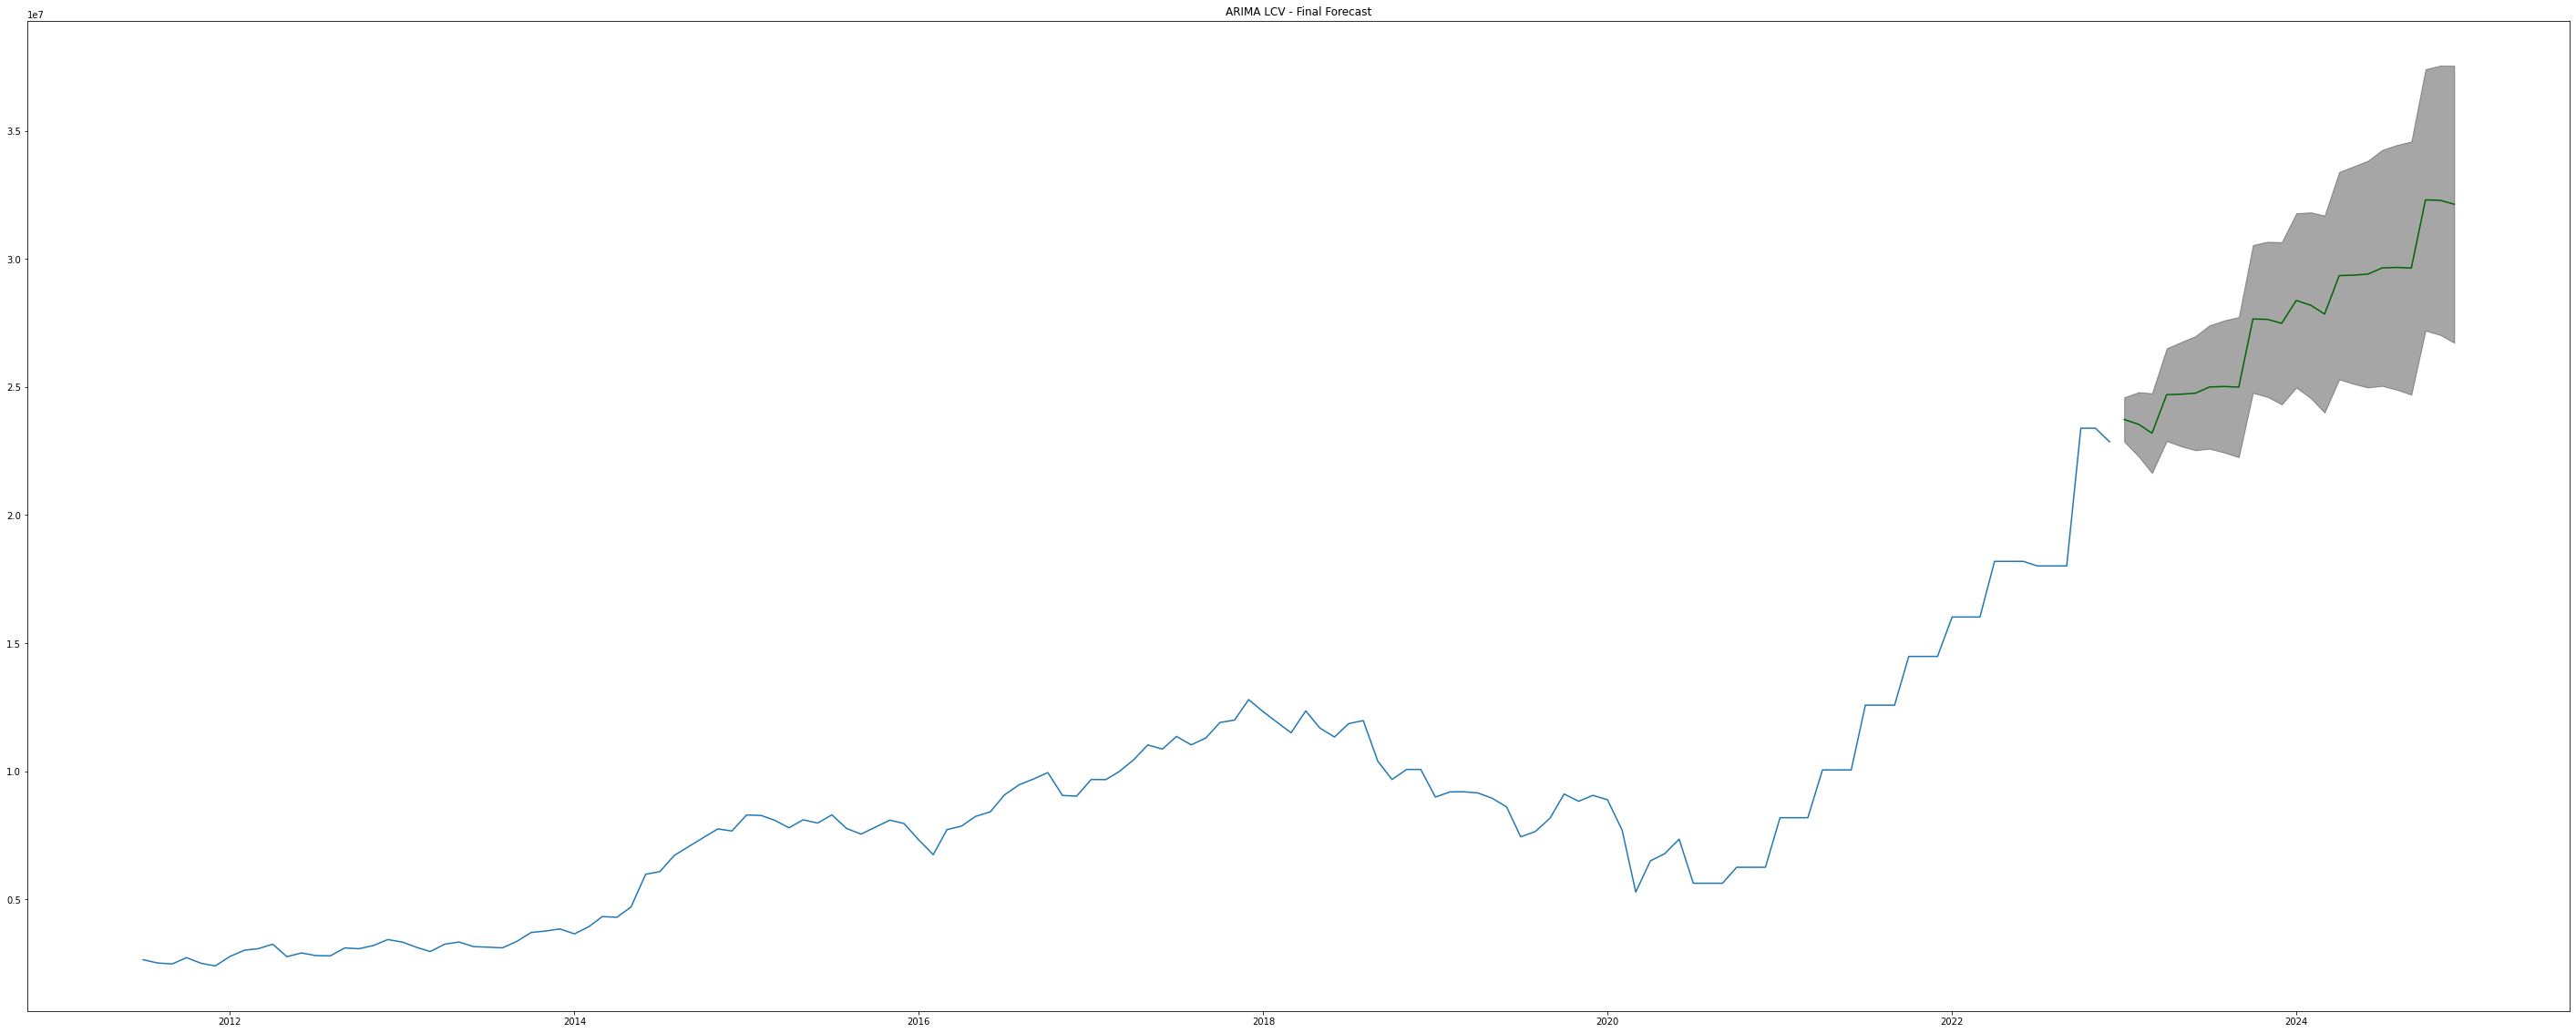

24 Growth YoY%
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=897.696, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=743.721, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=895.696, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=773.871, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=716.575, Time=0.58 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=711.258, Time=0.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=713.209, Time=1.31 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=712.173, Time=0.95 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=712.592, Time=1.16 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   :

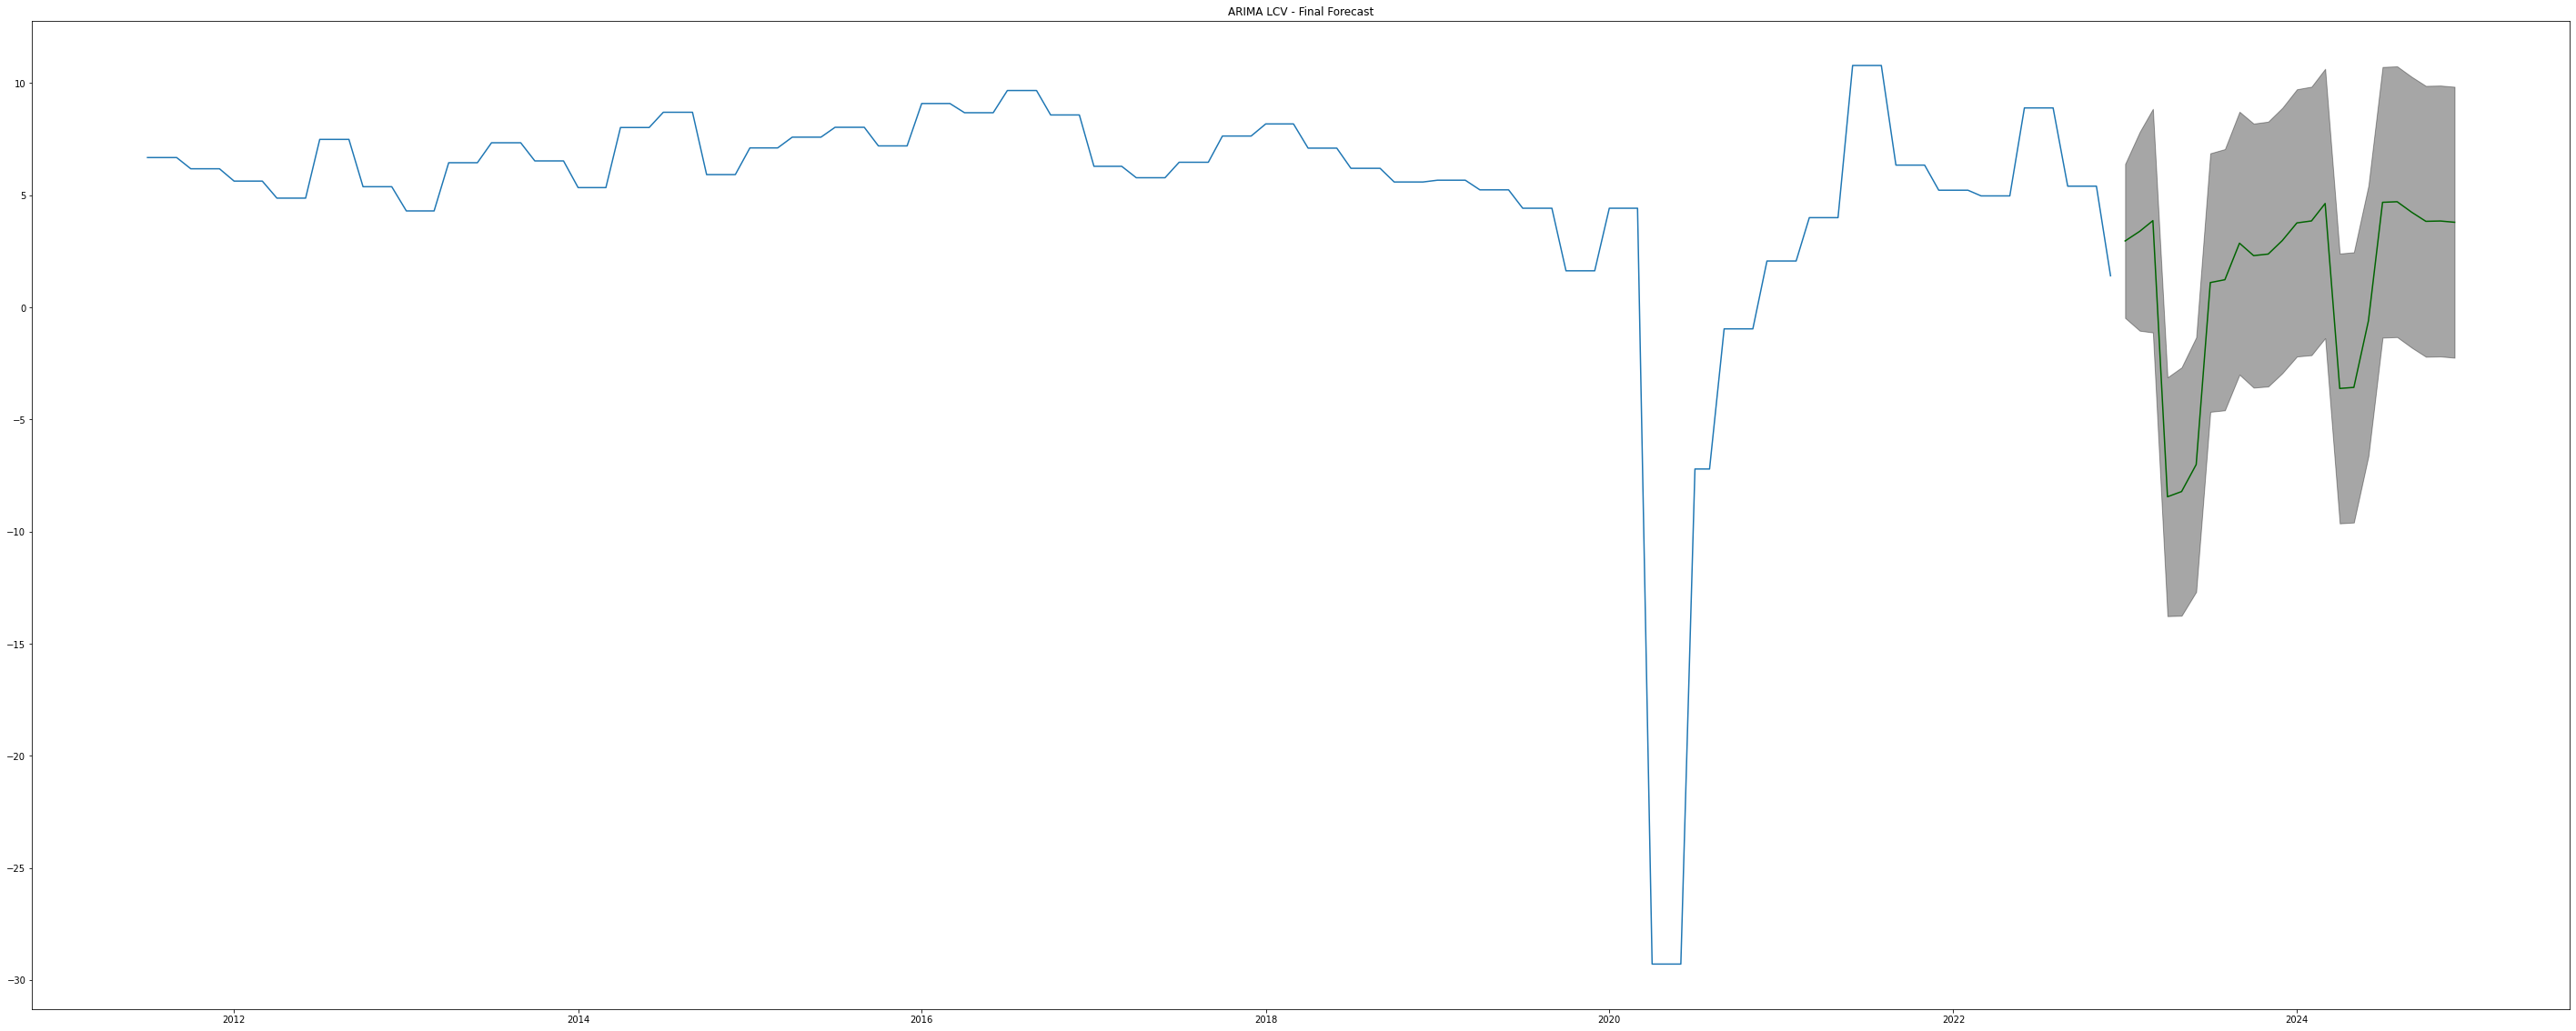

In [10]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA LCV - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [11]:
## Resetting the index after the forecast and mapping

data.to_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\HCV_Forecast_2023_2024.csv",index=False)